<a href="https://colab.research.google.com/github/DataExplorator/MarketingAnalytics/blob/main/Customer_Lifetime_Value_RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------
# **Customer Lifetime Value Analysis**
-------------------------------------

--------------------
## **Context / Scenario**
--------------------

You work for the `Tableau SuperStore`, where office supplies are sold. The business has asked you to help them understand their marketing efforts from a customer perspective. Specifically, they've asked you to help them understand their customers and the value they bring to the business. You decide that `Customer Lifetime Value analysis` is the correct route based on the business problem with which you've been presented.

You have a bunch of data on the customer level that has been collected over the last four years. [The Sample Superstore Dataset](https://help.tableau.com/current/guides/get-started-tutorial/en-us/get-started-tutorial-connect.htm)

------------------
## **Objective**
------------------

To extract actionable insights around customer engagement from the dataset.

**What is a CLV Analytsis?**

CLV / Customer lifetime value is a customer's complete value to a business entity over the lifetime of their partnership. CLV is valuable to businesses because it helps decision-makers better understand how different segments of customers are reacting/engaging in different transactions and how to reach them with the right messaging at the right time. The rule of thumb is that `it costs less to keep existing customers than it does to acquire new ones,` so increasing the value/engagement of your existing customers is a great way to drive growth.

**Benefits of CLV Analysis**

One can use CLV analyses to understand attrition, how much a customer costs your business, inform your sales/marketing efforts, etc. CLV analytics can help you understand some of the factors below:

> **`CAC-Customer Acquisition Cost:`** CAC represents the money you invest in attracting a new customer, including advertising, marketing, special offers, etc.
> **`Customer Cohorts / Segments:`** Separating your loyal customers from the others (customers representing an opportunity to your business).

> **`Touch-points:`** Which customers require which touch-points in order to re-engage.

> **`Retention:`** Build a strategy to help retain your valuable customers.

-----------------------------
## **Some Key Questions**
-----------------------------



1.   What are the peak sales months?
2.   What are the top cities in terms of sales?
3.   What are the bottom cities in terms of sales?
4.   How are customers distributed per city?
5.   How many customers are repeat customers?
6.   Who are the most frequent shoppers?
7.   Which customers spent the most money?
8.   What is the average retention time per customer? What is the trend of retention?
9.   What is the average purchase/spending behavior of each cohort?
10.   What is the average monthly quantity per cohort?
11.   What's the average customer lifespan?
12.   What's the average purchase frequency rate?
13.   What are the average churn & retention rates?
14.   Which customers have the highest spend probability in the next 90 days?
15.   Which customers have recently purchased but are unlikely to buy?
16.   Which customers represent our missed opportunities (big spenders that could be unlocked)?

------------------------------------
## **Dataset Description**
------------------------------------
The Sample Superstore dataset, as it's called, contains information about products, sales, profits, and so on that, you can use to identify key areas for improvement within this fictitious company. The initial data contains the following columns:

- `Category:` The general category of the item
- `City:` The city where the item was purchased / where the item was purchased
- `Country/Region:` Name of the country where each customer resides / where the item was purchased
- `Customer Name:` Customer number that consists of five digits. Each customer has a unique customer ID.
- `Manufacturer:` The company that produces the products sold by the superstore
- `Order Date:` The date on which the item was purchased
- `Order ID:` The unique ID associated with each purchase
- `Postal Code:` The 5-digit location code where the item was purchased
- `Product Name:` The unique name of the item sold/purchased
- `Region:` The geographical region grouping where products are sold/purchased
- `Segment:` The second level category item grouping
- `Ship Date:` The date on which the item was shipped to the purchaser
- `Ship Mode:` The shipping priority designated by "first class," "standard," etc.
- `State/Province:` The state in which the item is sold/was purchased
- `Sub-Category:` The lowest level of product grouping
- `Discount:` Promotional incentives provided to certain customers
- `Profit:` The revenue generated from all sales
- `Quantity:` The quantities of each product per transaction.
- `Sales:` The amount spent on each item

## **Phase 1: Packages & Loading Data**

### **Install the requisite packages**

In [828]:
# !pip install --upgrade gspread
# !pip install plydata
# !pip install --force-reinstall kaleido==0.1.0

### **load / import requisit packages**

In [829]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math

# Libraries to help with data visualization
import plotly
import plotly.express as px
import plotly.io as pio
pio.templates
# pio.renderers.default = "svg"
import plotly.figure_factory as ff
import plotly.graph_objs as go
from itertools import cycle, islice
from plotly.offline import plot
import cufflinks as cf
import kaleido
from pathlib import Path

import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score
import statsmodels.api as sm

import joblib

import plydata.cat_tools as cat
import plotnine as pn

from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV

pn.options.dpi = 100

from tabulate import tabulate

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [830]:
print(plotly.__version__, kaleido.__version__)

5.13.1 0.1.0


### **Import Data from Google Sheet**

This chunk of code below will help you connect to the data source in your drive, and preview the data.

In [831]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# connecting to the Google sheet
wb = gc.open_by_key('1zHmbHbRaDQ3NRWyLi7OG7TuRubgbOrlx75mKqz5gOzE')
# connecting to the specific tab within that sheet
ws = wb.worksheet('data')

# get_all_values gives a list of rows.
rows = ws.get_all_values()
# print(rows)

In [832]:
# Convert to a DataFrame and render.
data = pd.DataFrame.from_records(rows[1:],columns=rows[0])

## **Phase 2: Data Cleaning & Modifications**

### **Data Cleaning / Processing**

#### **Check shape of data**
Let's start by checking the shape of our dataset

In [833]:
# Print the shape of the data
data.shape

(10194, 19)

##### **Observations and Insights:**

> There are **`10194 rows`** and **`19 columns`** in the dataset.

#### **Check the data types and missing values**
Next, let's check the data types and missing values in each column

In [834]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        10194 non-null  object
 1   City            10194 non-null  object
 2   Country/Region  10194 non-null  object
 3   Customer Name   10194 non-null  object
 4   Manufacturer    10194 non-null  object
 5   Order Date      10194 non-null  object
 6   Order ID        10194 non-null  object
 7   Postal Code     10194 non-null  object
 8   Product Name    10194 non-null  object
 9   Region          10194 non-null  object
 10  Segment         10194 non-null  object
 11  Ship Date       10194 non-null  object
 12  Ship Mode       10194 non-null  object
 13  State/Province  10194 non-null  object
 14  Sub-Category    10194 non-null  object
 15  Discount        10194 non-null  object
 16  Profit          10194 non-null  object
 17  Quantity        10194 non-null  object
 18  Sales 

##### **Observations and Insights:**

> The data comprises of only the **`object`** type, so we will have to convert some columns later

#### **Check for null / missing values**

> One of the most common problems in data science is missing values. To detect them, we will use the .isnull() method.

In [835]:
# Detect missing values
data.isnull().sum()

Category          0
City              0
Country/Region    0
Customer Name     0
Manufacturer      0
Order Date        0
Order ID          0
Postal Code       0
Product Name      0
Region            0
Segment           0
Ship Date         0
Ship Mode         0
State/Province    0
Sub-Category      0
Discount          0
Profit            0
Quantity          0
Sales             0
dtype: int64

In [836]:
# how much of the data is missing
def missing(data):
    print (round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False))

missing(data)

Category          0.0
Segment           0.0
Quantity          0.0
Profit            0.0
Discount          0.0
Sub-Category      0.0
State/Province    0.0
Ship Mode         0.0
Ship Date         0.0
Region            0.0
City              0.0
Product Name      0.0
Postal Code       0.0
Order ID          0.0
Order Date        0.0
Manufacturer      0.0
Customer Name     0.0
Country/Region    0.0
Sales             0.0
dtype: float64


##### **Observations and Insights:**

> There are no missing values data in the dataset, so we don't need to drop those, or replace null values with something else.

#### **Data Preprocessing**

Let's start by cleaning the column naming conventions

In [837]:
# Clean naming conventions
data.columns = [c.replace(' ', '') for c in data.columns]
data.columns = [c.replace('-', '') for c in data.columns]
data.columns = [c.replace('/', '') for c in data.columns]
data.columns

Index(['Category', 'City', 'CountryRegion', 'CustomerName', 'Manufacturer',
       'OrderDate', 'OrderID', 'PostalCode', 'ProductName', 'Region',
       'Segment', 'ShipDate', 'ShipMode', 'StateProvince', 'SubCategory',
       'Discount', 'Profit', 'Quantity', 'Sales'],
      dtype='object')

In [838]:
# Converting date variable
data = data \
    .assign(
        OrderDate = lambda x: pd.to_datetime(x['OrderDate']) # convert to datetime
    )\
    .dropna() # drop any n/a values

In [839]:
# creating date / time features
data["OrderMonth"] = data["OrderDate"].apply(lambda x : dt.datetime(x.year,x.month,1))
data["Day"] = data.OrderDate.dt.day
data["DayofYear"] = data.OrderDate.dt.dayofyear
data["WeekDay"] = data.OrderDate.dt.weekday
data["WeekDayName"] = data.OrderDate.dt.day_name()
data["Week"] = data['OrderDate'].dt.isocalendar().week
data["Month"] = data.OrderDate.dt.month
data["MonthName"] = data.OrderDate.dt.month_name()
data["Quarter"] = data.OrderDate.dt.quarter
data["Year"] = data.OrderDate.dt.year

In [840]:
# change numerical data types
data['Discount'] = data['Discount'].str.replace(',','').astype(float)
data['Profit'] = data['Profit'].str.replace(',','').astype(float)
data['Quantity'] = data['Quantity'].str.replace(',','').astype(float)
data['Sales'] = data['Sales'].str.replace(',','').astype(float)

In [841]:
# add a column for sales value
data['AvgPurchaseValue'] = data['Sales'] / data['Quantity']

In [842]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Category          10194 non-null  object        
 1   City              10194 non-null  object        
 2   CountryRegion     10194 non-null  object        
 3   CustomerName      10194 non-null  object        
 4   Manufacturer      10194 non-null  object        
 5   OrderDate         10194 non-null  datetime64[ns]
 6   OrderID           10194 non-null  object        
 7   PostalCode        10194 non-null  object        
 8   ProductName       10194 non-null  object        
 9   Region            10194 non-null  object        
 10  Segment           10194 non-null  object        
 11  ShipDate          10194 non-null  object        
 12  ShipMode          10194 non-null  object        
 13  StateProvince     10194 non-null  object        
 14  SubCategory       1019

##### **Observations and Insights:**

> We can now see that **`OrderDate`**  is now rendering as datetime, and **`Sales`** and other numerical values are rendering as the right datatypes.
> - Column names have also been cleaned
> - New date variables have been added

In [843]:
data.head(3)

,Category,City,CountryRegion,CustomerName,Manufacturer,OrderDate,OrderID,PostalCode,ProductName,Region,...,Day,DayofYear,WeekDay,WeekDayName,Week,Month,MonthName,Quarter,Year,AvgPurchaseValue
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2019-01-03,US-2019-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,...,3,3,3,Thursday,1,1,January,1,2019,8.224
1,Office Supplies,Naperville,United States,Phillina Ober,GBC,2019-01-04,US-2019-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,...,4,4,4,Friday,1,1,January,1,2019,1.770
2,Office Supplies,Naperville,United States,Phillina Ober,Avery,2019-01-04,US-2019-112326,60540,Avery 508,Central,...,4,4,4,Friday,1,1,January,1,2019,3.928


## **Phase 3: Summary Statistics**

##### **Summary statistics**

Use the `.describe()` method to get the following:

* get a summary of numeric values in your dataset.
* It calculates the mean, standard deviation, minimum value, maximum value, 1st percentile, 2nd percentile, 3rd percentile of the columns with numeric values.
* count the number of variables in the dataset.

In [844]:
data.describe()

,Discount,Profit,Quantity,Sales,Day,DayofYear,WeekDay,Week,Month,Quarter,Year,AvgPurchaseValue
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.0,10194.000000,10194.000000,10194.000000,10194.000000
mean,0.155385,28.673417,3.791838,228.225854,15.445066,222.054836,3.476849,31.956151,7.811850,2.882676,2020.720129,60.662783
std,0.206249,232.465115,2.228317,619.906839,8.729661,100.573294,1.948141,14.380089,3.295915,1.060316,1.125611,142.532974
min,0.000000,-6599.978000,1.000000,0.444000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,2019.000000,0.336000
25%,0.000000,1.760800,2.000000,17.220000,8.000000,140.000000,2.000000,20.0,5.000000,2.000000,2020.000000,5.430000
50%,0.200000,8.690000,3.000000,53.910000,15.000000,245.000000,4.000000,35.0,9.000000,3.000000,2021.000000,15.992000
75%,0.200000,29.297925,5.000000,209.500000,23.000000,313.000000,5.000000,45.0,11.000000,4.000000,2022.000000,63.686000
max,0.800000,8399.976000,14.000000,22638.480000,31.000000,366.000000,6.000000,53.0,12.000000,4.000000,2022.000000,3773.080000


##### **Observations and Insights:**

> We can see that count of `Sales` column is **10194**, mean is **2228.2**, standard deviation is **619.9**

In [845]:
# describe the categorical data
data.describe(include=object)
# Note: If we do not pass include=object to the describe(), it would return statistics for numeric variable

,Category,City,CountryRegion,CustomerName,Manufacturer,OrderID,PostalCode,ProductName,Region,Segment,ShipDate,ShipMode,StateProvince,SubCategory,WeekDayName,MonthName
count,10194,10194,10194,10194,10194,10194,10194,10194,10194,10194,10194,10194,10194,10194,10194,10194
unique,3,542,2,800,183,5111,654,1849,4,3,1338,4,59,17,7,12
top,Office Supplies,New York City,United States,William Brown,Other,US-2022-100111,10035,Staples,West,Consumer,12/16/2020,Standard Class,California,Binders,Sunday,November
freq,6128,915,9994,41,1940,14,263,50,3253,5281,38,6120,2001,1548,1959,1474


##### **Observations and Insights:**

> We can see that there are **800** unique `	CustomerName`, **183** unique `Manufacturer`, **17** `SubCategory`, etc.

#### **Correlation Heatmap**

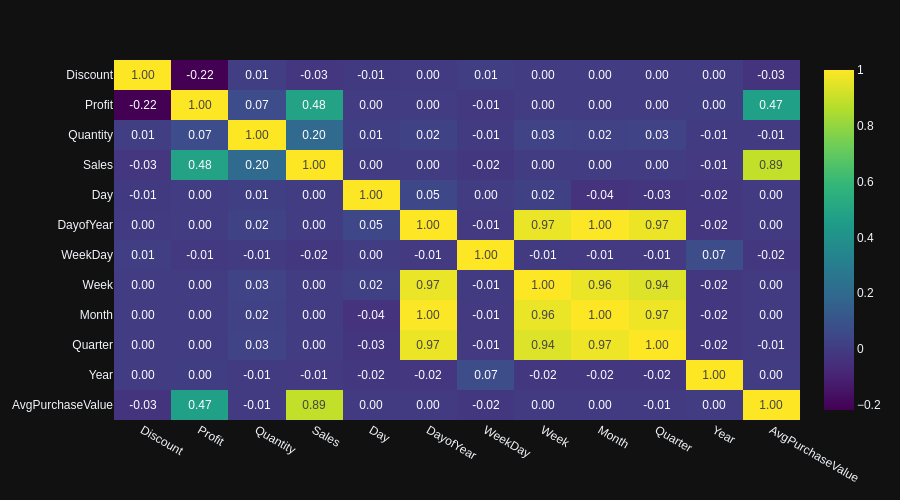

In [846]:
df_corr = data.corr()

for template in ["plotly_dark"]:

# Ploting correlation plot
  fig = px.imshow(df_corr, text_auto='.2f', aspect="auto", template=template, color_continuous_scale="Viridis")
  fig.update_layout(width=900, height=500).show("png")

##### **Observations and Insights:**

> `Note`: While the correlation between two independent events is zero, two events with zero correlations may not be independent.

> As we can see in the correlation heatmap, some of our variables such as **`Sales`** and **`Profit`** are more positively correlated than other metrics.

## **Phase 4: Some Basic Insights**

##### **Some Numerical Facts**

In [847]:
# Let's answer some questions about our dataset

StartDate = data['OrderDate'].min().strftime('%Y/%m/%d')
EndDate = data['OrderDate'].max().strftime('%Y/%m/%d')

# How many unique invoices are in this dataset?
print("Approximately {} invoices were carried out from: {} to {}".format(len(data['OrderID'].unique()),StartDate, EndDate))
# How many unique goods were sold in this dataset?
print("Goods from {} Sub Categories were sold from: {} to {}".format(len(data['SubCategory'].unique()),StartDate, EndDate))
# How many unique customers in this dataset?
print("Approximately {} customers were served from: {} to {}".format(len(data['CustomerName'].unique()),StartDate, EndDate))
# How many cities do the customer come from in this dataset?
print("Customers were coming from {} cities".format(len(data['City'].unique())))

Approximately 5111 invoices were carried out from: 2019/01/03 to 2022/12/30
Goods from 17 Sub Categories were sold from: 2019/01/03 to 2022/12/30
Approximately 800 customers were served from: 2019/01/03 to 2022/12/30
Customers were coming from 542 cities


##### **What are the peak sales months?**

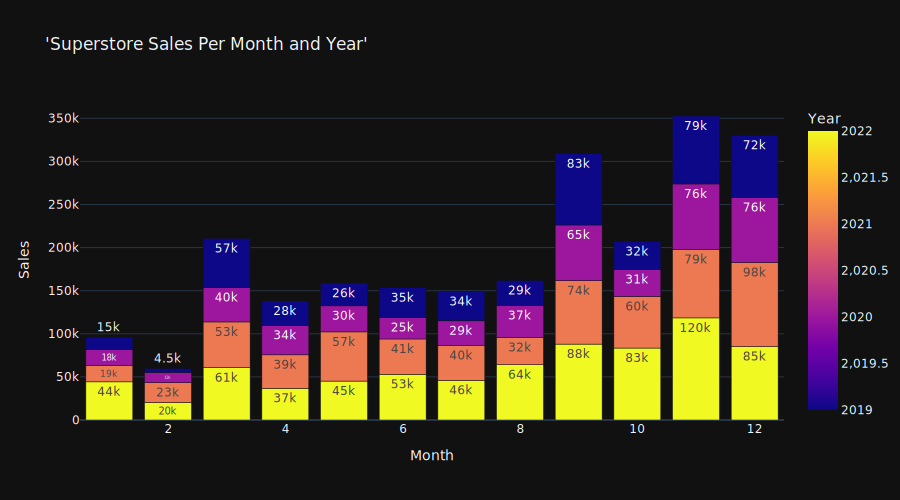

In [848]:
# Let's wrangle the data
a = data.groupby(['Year', 'Month']).agg({'Sales': 'sum'}).sort_values(by = ['Year','Month', 'Sales'], ascending = [False, False, False])
a = a.reset_index()
# a.head()

# Plot chart per day
fig = px.bar(a, x='Month', y='Sales', color='Year', title="'Superstore Sales Per Month and Year'", template="plotly_dark", text_auto='.2s')
fig.update_layout(width=900, height=500).show()
# fig.write_image('corr.png', engine='kaleido')

##### **Observations and Insights:**

> As we can see, November has the highest total sales volumne at `$352,666`, which is `70%` higher than the prior month.

> But we can also see that the overall volume is buoyed by 2022's volume

##### **What are the top cities in terms of sales?**

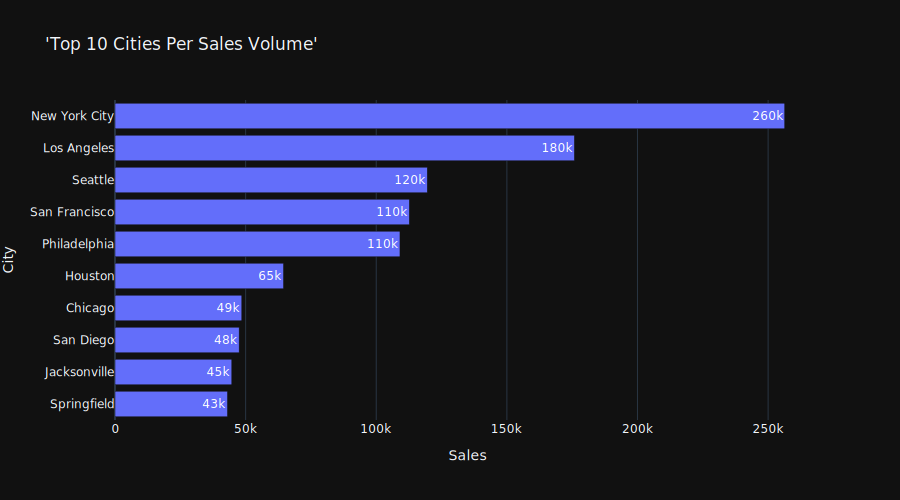

In [849]:
# Let's wrangle the data
b = data.groupby(['City']).agg({'Sales': 'sum'}).sort_values(by = ['City','Sales'], ascending = [False, False]).reset_index()

# Select top 10 only
top = b.nlargest(10,'Sales')

# Sort data in the right order
top = top.sort_values(by='Sales', ascending=True).groupby('City').head()

# Build the chart
fig = px.bar(top, x='Sales', y='City', orientation='h', title="'Top 10 Cities Per Sales Volume'", template="plotly_dark", text_auto='.2s')
fig.update_layout(width=900, height=500).show()

##### **Observations and Insights:**

> `NYC` and `Los Angeles` are the top cities wih the most sales volumne. One thing you may notice is that this list does not adhere to population. An inference we can draw here is that, this list is dominated by cities with more business units. I'm not sure how accurate that accessment is, but one worth investigating.

##### **What are the bottom cities in terms of sales?**

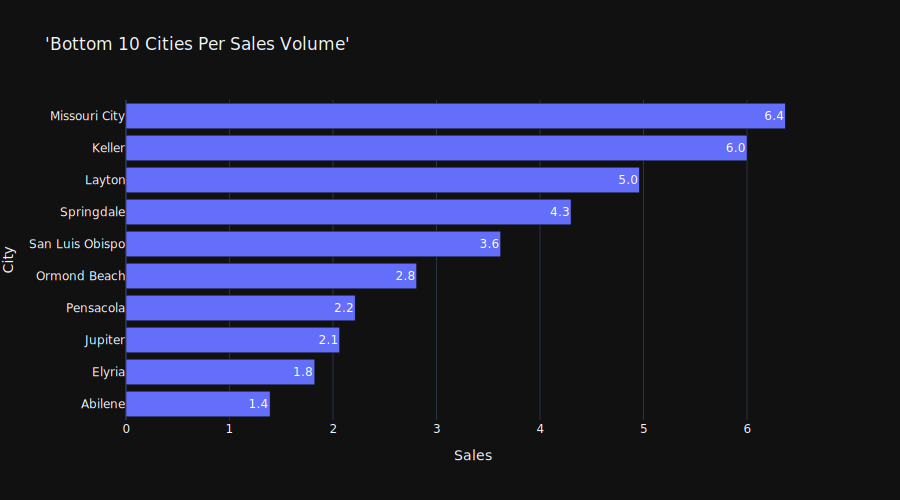

In [850]:
# Select bottom 10 only
bot = b.nsmallest(10,'Sales')

# Build the chart
fig = px.bar(bot, x='Sales', y='City', orientation='h', title="'Bottom 10 Cities Per Sales Volume'", template="plotly_dark", text_auto='.2s')
fig.update_layout(width=900, height=500).show()

##### **Observations and Insights:**

> The bottom 10 cities are lead by cities like `Abilene`,`Elyria`, `Jupiter`, `Pensacola`, etc. A few follow up questions that come to mind are the following:

>> 1. What are our growth opportunities in these markets?
>> 2. How much of our marketing resouses do we allocate to markets such as these?

##### **How are customers distributed per city?**

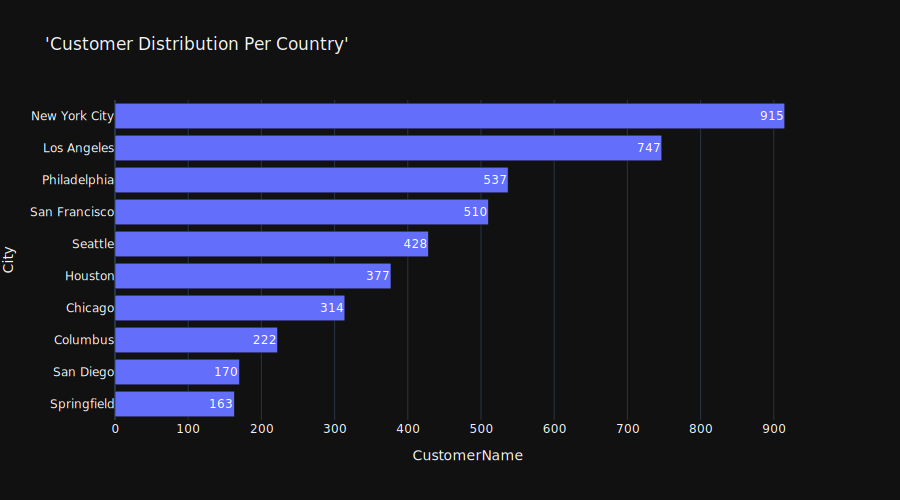

In [851]:
# Let's wrangle the data
c = data[['City', 'CustomerName']].groupby('City').count().sort_values(by = 'CustomerName', ascending = False)
c = c.reset_index()
c.head()

# Select top 10 only
c = c.nlargest(10,'CustomerName').sort_values(by='CustomerName', ascending=True).groupby('City').head()

# Build the chart
fig = px.bar(c, x='CustomerName', y='City', orientation='h', title="'Customer Distribution Per Country'", template="plotly_dark", text_auto='.3s')
fig.update_layout(width=900, height=500).show()

##### **Observations and Insights:**

> The top 10 cities with the most customers are lead by cities like `NYC`, `LA`, `Philly`, and `San Fran`.

##### **How many customers are repeat customers?**

In [852]:
users = data.groupby(['CustomerName'])[['OrderID']].nunique()
print("There are approximately " + str((len(users))) + " unique customers in our dataset")

There are approximately 800 unique customers in our dataset


In [853]:
MulOrders = pd.DataFrame(data.groupby(['CustomerName'])[['OrderID']].nunique())
MulOrders['OrderID']=MulOrders['OrderID'].astype(int)
MulOrders=MulOrders[MulOrders['OrderID']>1]
print("The number of customers with more than 1 order is: " + str((len(MulOrders))))

The number of customers with more than 1 order is: 788


In [854]:
rep = len(MulOrders) / len(users)
print("This means that about " + str(round(rep,2)) + " percent of the entire customer base are repeat customers")

This means that about 0.98 percent of the entire customer base are repeat customers


##### **Observations and Insights:**

> 1. There are approximately `800 unique customers`
> 2. The number of customers with `more than 1 order is: 788`
> 3. This means that about `0.98 percent of the entire customer base are repeat customers`

##### **Who are the most frequent shoppers?**

In [855]:
data["CustomerName"].value_counts().head()

William Brown    41
Ben Ferrer       37
Greg Guthrie     36
Jane Waco        34
John Lee         34
Name: CustomerName, dtype: int64

##### **Observations and Insights:**

> The top five customers with the most orders include `William Brown`, `Ben Ferrer`, `Greg Guthrie`, `Jane Waco`, and `John Lee`.

##### **Which customers spent the most money?**

In [856]:
data.groupby("CustomerName").agg({"Sales": "sum"}).sort_values(by = "Sales", ascending = False).reset_index().head()

,CustomerName,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571


##### **Observations and Insights:**

> The top five customers with the most orders are not highest spenders. The highest spenders include `Sean Miller`, `Tamara Chand`, `Raymond Buch`, `Tom Ashbrook`, and `Adrian Barton`.

## **Phase 5: Customer Lifetime Value Analysis**

##### **What is the average retention time per customer? What is the trend of retention?**

In [857]:
# Add a new column for order month & year
data['OrderDate']=pd.to_datetime(data['OrderDate'])
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

# Create the order month period column
data['InvoiceMonthYear'] = data['OrderDate'].apply(get_month)
# data.head(3)

In [858]:
#finding and assigning earliest acquisition data
group = data.groupby('CustomerName')['OrderMonth']
#cohort refers to a group of customers aquired around the same time
data['CohortMonth'] = group.transform('min')
# data.head(3)

In [859]:
# convert dates to datetime
data['OrderMonth']=pd.to_datetime(data['OrderMonth'])
data['CohortMonth']=pd.to_datetime(data['CohortMonth'])

# find number of months retained
ord_yr, ord_mnth = data['OrderMonth'].dt.year,data['OrderMonth'].dt.month
coh_yr, coh_mnth = data['CohortMonth'].dt.year,data['CohortMonth'].dt.month
yrs_diff = ord_yr - coh_yr
mnths_diff = ord_mnth - coh_mnth
data['MonthsRetained'] = yrs_diff * 12 + mnths_diff + 1
# data.head()

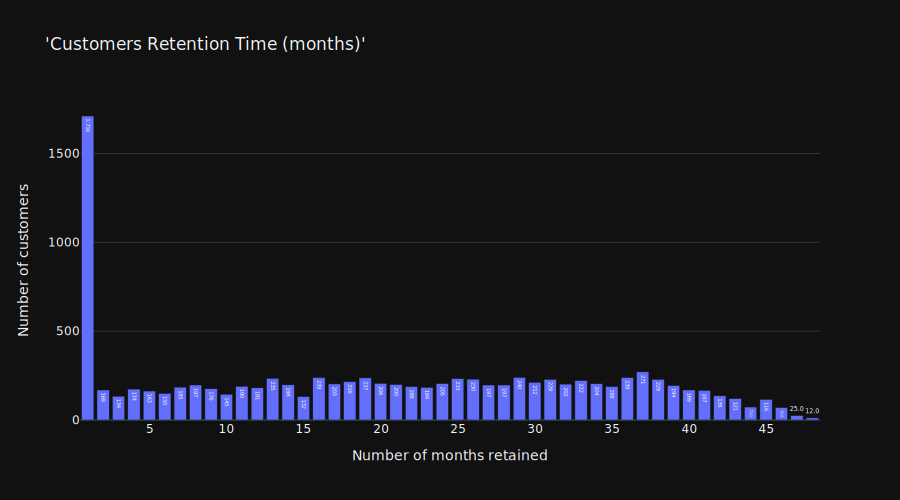

In [860]:
# Customers distribution by city
mnths_ret = data[['CustomerName', 'MonthsRetained']].groupby('MonthsRetained').count().sort_values(by='CustomerName', ascending=False).reset_index()

fig = px.bar(mnths_ret, x='MonthsRetained', y='CustomerName', labels={"MonthsRetained": "Number of months retained","CustomerName": "Number of customers"},
             title="'Customers Retention Time (months)'", template="plotly_dark", text_auto='.3s')
fig.update_layout(width=900, height=500).show()

##### **Observations and Insights:**

> 1. The majority of customers are retained for at least a month.
> 2. There's a significant decrease in the number of customers retained in the months directly after. That said, there is a steady flow of customers for the remainder of the year, with the exception of the last month.

**Next, let's examine retention rates for each cohort of customers.**

In [861]:
Cust_Cohort = data.groupby(['CohortMonth', 'MonthsRetained'])
Cohorts = Cust_Cohort['CustomerName'].apply(pd.Series.nunique).reset_index()
Coh_Counts = Cohorts.pivot(index='CohortMonth', columns='MonthsRetained', values='CustomerName')
Coh_Sizes = Coh_Counts.iloc[:,0]
Retention_Rate = Coh_Counts.divide(Coh_Sizes, axis=0)*100

In [862]:
Month_List = Retention_Rate.reset_index()['CohortMonth']

def get_month_name(x):
   return dt.datetime.strftime(x, '%b-%y')

Month_List = Month_List.apply(get_month_name)

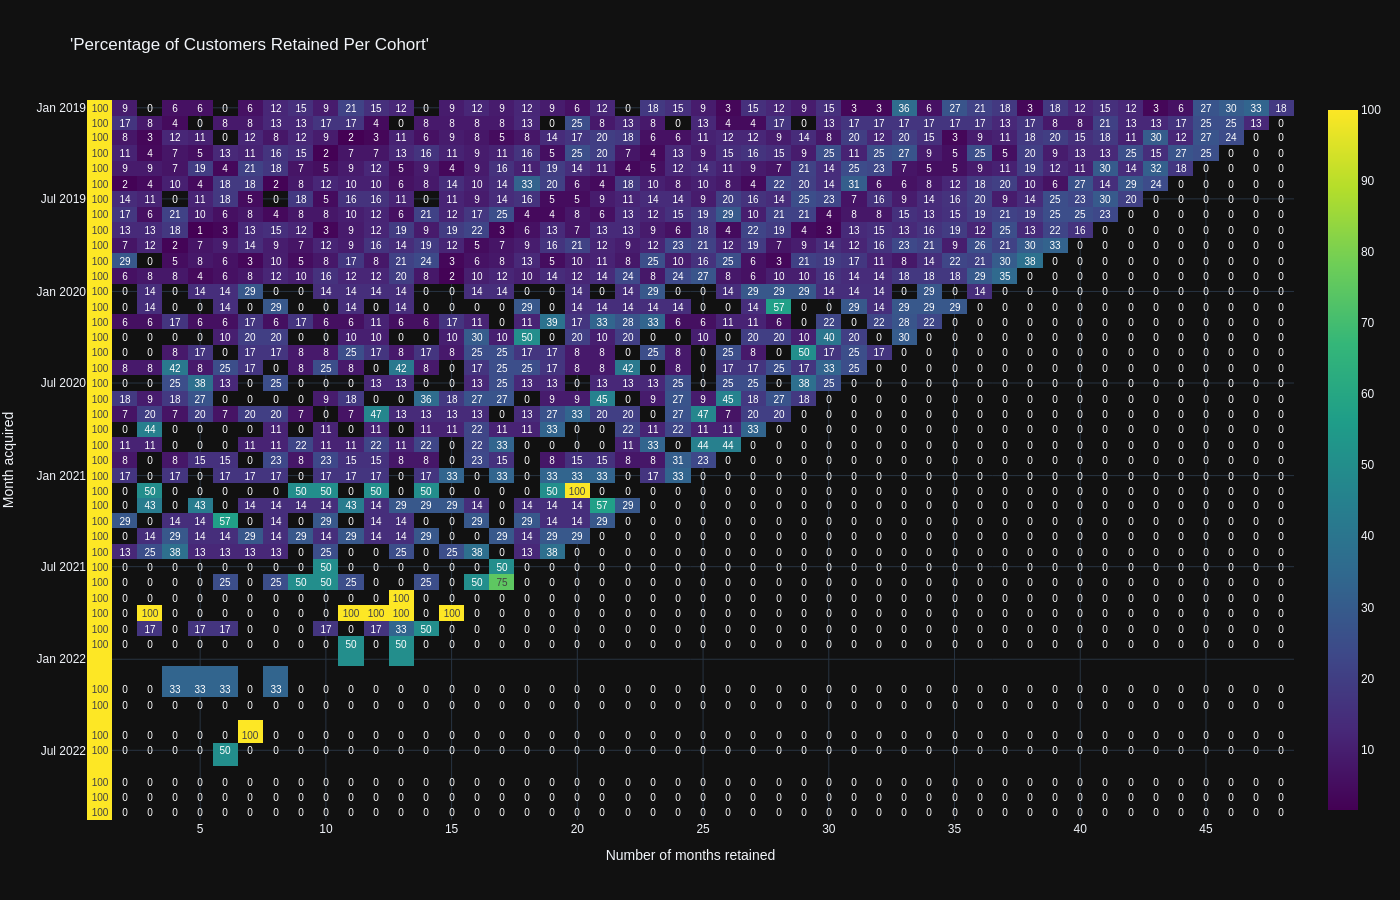

In [863]:
fig = px.imshow(Retention_Rate, labels=dict(x="Number of months retained", y="Month acquired"), text_auto='.0f', aspect="auto", color_continuous_scale="Viridis",
                title="'Percentage of Customers Retained Per Cohort'", template="plotly_dark").update_layout(width=1400, height=900).update_xaxes(side="bottom").show("png")

##### **Observations and Insights:**

> 1. As the months go by, retention varies per cohort
> 2. Customers acquired (made their first purchase) `in Jan 2019 were more so docile for the next 32 months`. However, they returned the subsequent month make purchases.
    - a. This trend can probably be attributed to some sort of promotional event, discounts, or other promotional activities conducted my the marketing team.
> 3. The primary takeway here is that engagement and re-engagement leads to repeat purchases / better retention. So it makes sense to build marketing programs that keep valuable customers engaged through their lifecycle with the company.

##### **What is the average purchase / spending behaviour of each cohort?**

In [864]:
Apv = Cust_Cohort['AvgPurchaseValue'].mean().reset_index()
Avg_Price = Apv.pivot(index='CohortMonth', columns='MonthsRetained', values='AvgPurchaseValue')
Avg_Price.index = Avg_Price.index.date

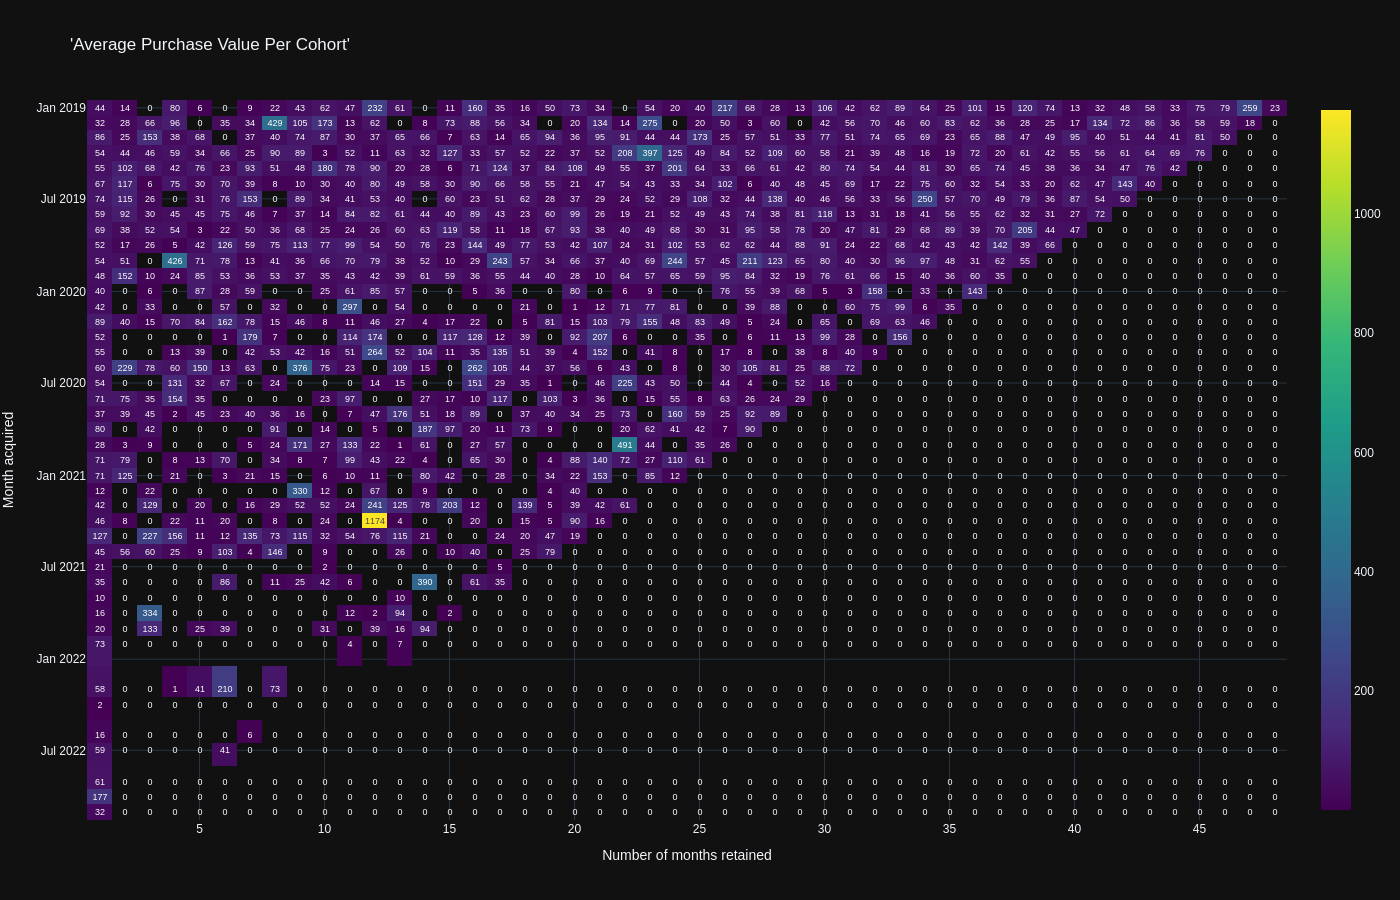

In [865]:
fig = px.imshow(Avg_Price, labels=dict(x="Number of months retained", y="Month acquired"), text_auto='.0f', aspect="auto", color_continuous_scale="Viridis",
                title="'Average Purchase Value Per Cohort'", template="plotly_dark").update_layout(width=1400, height=900).update_xaxes(side="bottom").show("png")

##### **Observations and Insights:**

> 1. The `average purchase value` fluctuates quite a bit. There are pockets of high efficiency, and pockets of low efficincy. That said, the highest purchase value comes from the `Apr 2021 cohort`.

##### **What is the average monthly quantity per cohort?**

In [866]:
qty = Cust_Cohort['Quantity'].mean().reset_index()
Avg_Quantity = qty.pivot(index='CohortMonth', columns='MonthsRetained', values='Quantity')
Avg_Quantity.index = Avg_Quantity.index.date

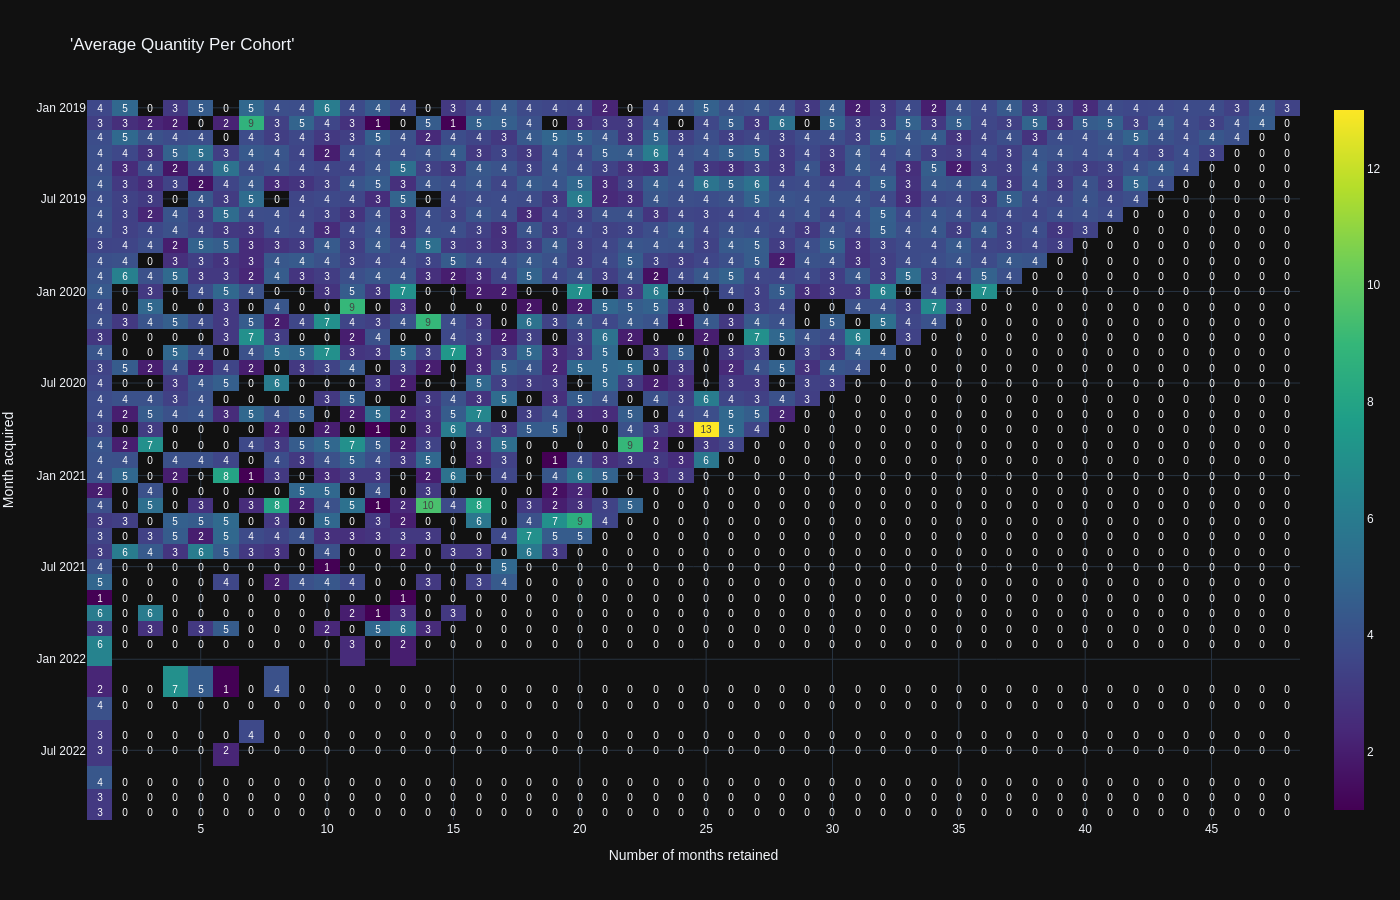

In [867]:
fig = px.imshow(Avg_Quantity, labels=dict(x="Number of months retained", y="Month acquired"), text_auto='.0f', aspect="auto", color_continuous_scale="Viridis",
                title="'Average Quantity Per Cohort'", template="plotly_dark").update_layout(width=1400, height=900).update_xaxes(side="bottom").show("png")

##### **Observations and Insights:**

> 1. The `average monthly quantity` fluctuates quite a bit, similar to average purchase value. There are pockets of high efficiency, and pockets of low efficincy. The most purchases comes from the `Oct 2020 cohort`.

##### **What's the average customer lifespan?**
Calculate this number by averaging the number of years/months a customer continues purchasing from your company

In [868]:
uni = data.groupby(['CustomerName'])[['MonthsRetained']].nunique().reset_index()

# Sum all customer lifespans
sumlifespans = uni['MonthsRetained'].sum()

# Count number of customers
numbcust = uni[['CustomerName']].count().sum()

# calculate lifespan
results = sumlifespans / numbcust
print("The sum of all customer lifespans is: " + str(sumlifespans))
print("The number of unique customer is: " + str((numbcust)))
print("Therefore, the average customer lifespan is approximately: " + str(round(results,2)) + " months")

The sum of all customer lifespans is: 4686
The number of unique customer is: 800
Therefore, the average customer lifespan is approximately: 5.86 months


##### **Average Purchase Value**
Calculate this number by dividing your company's total revenue in a period (usually one year) by the number of purchases throughout that same period.

In [869]:
avp = data.groupby("OrderID").agg({"Sales": "sum"}).sort_values(by = "Sales", ascending = False).reset_index()

# Total sales
rev = avp['Sales'].sum()

# Number of orders
ord = avp[['OrderID']].count().sum()

# calculate lifespan
AvgPurValue = rev / ord
print("The total sales volume is: " + str(rev) + " USD/Equivalent")
print("The number of unique orders is: " + str((ord)))
print("Therefore, the average purchase value is approximately: " + str(round(AvgPurValue,2)) + " USD/Equivalent")

The total sales volume is: 2326534.3543 USD/Equivalent
The number of unique orders is: 5111
Therefore, the average purchase value is approximately: 455.2 USD/Equivalent


##### **Average Purchase Frequency Rate**
Calculate this number by dividing the number of purchases by the number of unique customers who made purchases during that period.

In [870]:
freq = data.groupby("CustomerName").agg({"Quantity": "sum"}).sort_values(by = "Quantity", ascending = False).reset_index()

# number of purchases
quan = freq['Quantity'].sum()

# number of customers
numbcust2 = freq[['CustomerName']].count().sum()

# Average Purchase Frequency Rate
results2 = quan / numbcust

print("The number of purchases is: " + str(quan))
print("The number of unique customer is: " + str((numbcust2)))
print("Therefore, the average purchase frequency rate: " + str(round(results2,2)))

The number of purchases is: 38654.0
The number of unique customer is: 800
Therefore, the average purchase frequency rate: 48.32


##### **Customer Value**
Calculate this number by multiplying the average purchase value by the average purchase frequency rate.

In [871]:
cv = AvgPurValue * results2
print("The value for each customer is: " + str(round(cv,2)) + " USD/Equivalent")

The value for each customer is: 21994.19 USD/Equivalent


##### **Customer Lifetime Value**

Customer Lifetime Value = (Customer Value * Average Customer Lifespan)
 - where Customer Value = Average Purchase Value * Average Number of Purchases

In [872]:
clv = cv * results
print("The average customer's lifetime value is: " + str(round(clv,2)) + " USD/Equivalent")

The average customer's lifetime value is: 128830.99 USD/Equivalent


##### **Churn & Retention Rates**

In [873]:
cohortsize = Coh_Counts.loc[:,1]
retention = Coh_Counts.divide(cohortsize, axis= 0)
RetentionRate = retention.iloc[:, 1:].mean().mean()
ChurnRate = 1 - RetentionRate

print("The average retention rate is: " + str(round(RetentionRate, 2)))
print("The average churn rate is: " + str(round(ChurnRate,2)))

The average retention rate is: 0.18
The average churn rate is: 0.82


##### **Customer Lifetime Insights Summary**

In [874]:
# summary of all the important numbers
print("The average retention rate is: " + str(round(RetentionRate, 2)))
print("The average churn rate is: " + str(round(ChurnRate,2)))
print("About " + str(round(rep,2)) + " percent of the entire customer base are repeat customers")
print("The average customer lifespan is approximately: " + str(round(results,2)) + " months")
print("The average purchase value is approximately: " + str(round(AvgPurValue,2)) + " USD/Equivalent")
print("The average purchase frequency rate: " + str(round(results2,2)))
print("The value for each customer is: " + str(round(cv,2)) + " USD/Equivalent")
print("The average customer's lifetime value is: " + str(round(clv,2)) + " USD/Equivalent")

The average retention rate is: 0.18
The average churn rate is: 0.82
About 0.98 percent of the entire customer base are repeat customers
The average customer lifespan is approximately: 5.86 months
The average purchase value is approximately: 455.2 USD/Equivalent
The average purchase frequency rate: 48.32
The value for each customer is: 21994.19 USD/Equivalent
The average customer's lifetime value is: 128830.99 USD/Equivalent


## **Phase 6: Machine Learning (RFM)**

We're going to do a cohort analysis. So we're going to be looking at the customers that have joined within a specific window. And we're going to start by finding the first purchases.

### **Cohort Analysis**

Only the customers that have joined at the specific business day

#### **Find & group purchasers by cohort**

In [875]:
# Get range of initial purchases
first_purchase_tbl = data \
    .sort_values(['CustomerName', 'OrderDate']) \
    .groupby('CustomerName') \
    .first()

In [876]:
# let's see what that table looks like now
first_purchase_tbl.head(3)

,Category,City,CountryRegion,Manufacturer,OrderDate,OrderID,PostalCode,ProductName,Region,Segment,...,WeekDayName,Week,Month,MonthName,Quarter,Year,AvgPurchaseValue,InvoiceMonthYear,CohortMonth,MonthsRetained
CustomerName,,,,,,,,,,,,,,,,,,,,,
Aaron Bergman,Office Supplies,Arlington,United States,Akro,2019-02-18,US-2019-152905,76017,Akro Stacking Bins,Central,Consumer,...,Monday,8,2,February,1,2019,6.312,2019-02-01,2019-02-01,1
Aaron Hawkins,Office Supplies,Troy,United States,ACCOHIDE,2019-04-22,US-2019-122070,12180,"ACCOHIDE 3-Ring Binder, Blue, 1""",East,Corporate,...,Monday,17,4,April,2,2019,3.304,2019-04-01,2019-04-01,1
Aaron Smayling,Office Supplies,New York City,United States,Xerox,2019-07-27,US-2019-150126,10035,Xerox 1956,East,Corporate,...,Saturday,30,7,July,3,2019,5.980,2019-07-01,2019-07-01,1


In [877]:
# Find Min Purchase Date
first_purchase_tbl['OrderDate'].min()

Timestamp('2019-01-03 00:00:00')

In [878]:
# Find Max Purchase Date
first_purchase_tbl['OrderDate'].max()

Timestamp('2022-11-05 00:00:00')

**`Context:`** Now, let's look at our purchases from an aggregate view. What this does, is we're taking our user data, and resetting the index to date. Then grab `Quantity` and resample it by month. So it's kind of like grouping by month of purchase and creates this resampled object to which we are going to apply an aggregation function.

#### **Visualize seasonal purchases**

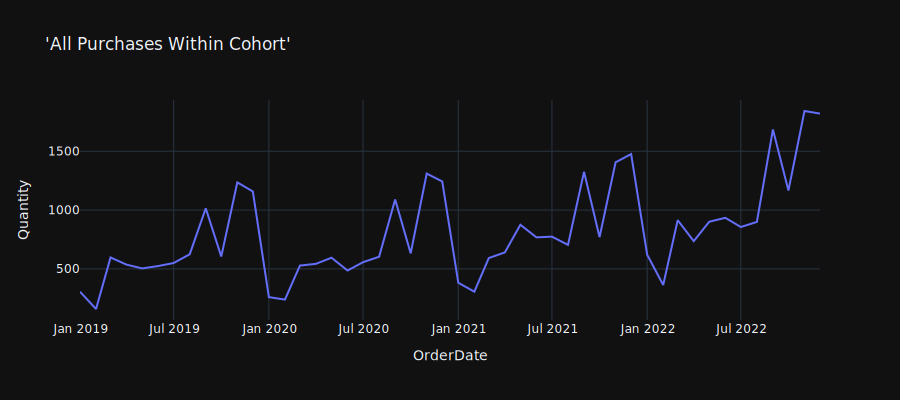

In [879]:
# Visualize: All purchases within cohort
d = data \
    .reset_index() \
    .set_index('OrderDate') \
    [['Quantity']] \
    .resample(
        rule = "MS"
    ) \
    .sum().reset_index()

fig = px.line(d, x='OrderDate', y='Quantity', title="'All Purchases Within Cohort'", template=template)
fig.update_layout(width=900, height=400).show()

##### **Observations and Insights:**

> The above gives us a high level visualization of purchase behavior for the customers that are within our cohort.

The next thing we want to do is take a look at a few customers, and see what their purchase behavior looks like, so we can understand a little more about the customers we are dealing with.

#### **Map customers individually**

In [880]:
# Visualize: Individual Customer Purchases
cids = data['CustomerName'].unique() # Select your unique customer ids
cids_selected = cids[20:50] # grab the first 10 or however many you want to preview

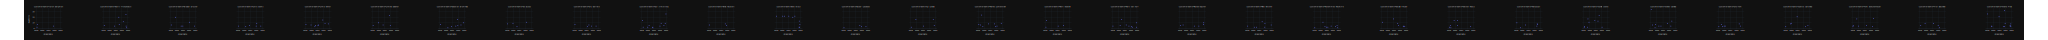

In [881]:
# This chunk helps you understand who purchased at what time based on the selection above
cust_subset = data \
    [data['CustomerName'].isin(cids_selected)] \
    .groupby(['CustomerName', 'OrderDate']) \
    .sum() \
    .reset_index()

fig = px.scatter(cust_subset, x="OrderDate", y="Quantity", facet_col="CustomerName", template=template).update_layout(width=15000, height=300).show()

##### **Observations and Insights:**

> Now we can see if a specific customer `purchased once twice, or Nth number of times`. For example customer **Barry Franzosisch** seems like a repeat customer who's likely to purchase in the next 90 Days, but why did they drop-off? That's what we want to prevent. Those are some of the users we want to re-engage.

#### **Machine learning Phase 1**

Frame the problem:

* What will the customers spend in the next 90-Days? (Regression)
* What is the probability of the customer making another purchase in next 90-days? (Classification)

#### **Time / temporal splitting**

In [882]:
# Temporal or Splitting By Time
n_days   = 90 # We want to then take 90 days from before that max date
max_date = data['OrderDate'].max() # what's the max date in our dataset?
cutoff   = max_date - pd.to_timedelta(n_days, unit = "d") # the resulting cut-off is what we're going to use for our 90 days

In [883]:
# We're going to create an in dataset: Dataset that's less then or equal to our cut-off date
temporal_in_df = data \
    [data['OrderDate'] <= cutoff]

In [884]:
# Then an out dataset: Dataset that's greater than our cut-off date
temporal_out_df = data \
    [data['OrderDate'] > cutoff]

**`Note:`** Now that we have our in and out datasets, we can start to create our features from these datasets

#### **Feature Engineering (RFM)**
> We need to frame the problem, then think about what features to include

##### **Calculate recency**

In [885]:
# Make targets from out data
targets_df = temporal_out_df \
    .drop('Quantity', axis=1) \
    .groupby('CustomerName') \
    .sum() \
    .rename({'Sales': 'spend_90_total'}, axis = 1) \
    .assign(spend_90_flag = 1) # These are all customers that have made purchases

In [886]:
# Create recency (date) feature
# So we want to know how recent was their most recent purchase
max_date = temporal_in_df['OrderDate'].max() # Create a static date, then compare below for each customer, what was their most recent purchase relative to this date.

In [887]:
# Now let's get recency data
recency_features_df = temporal_in_df \
    [['CustomerName', 'OrderDate']] \
    .groupby('CustomerName') \
    .apply(
        lambda x: (x['OrderDate'].max() - max_date) / pd.to_timedelta(1, "day")
    ) \
    .to_frame() \
    .set_axis(["recency"], axis=1) # Setting the axis/index will help us later to merge data

In [888]:
# Our final recency feature looks something like this:
recency_features_df.head()

,recency
CustomerName,
Aaron Bergman,-325.0
Aaron Hawkins,-560.0
Aaron Smayling,-27.0
Adam Bellavance,-15.0
Adam Hart,-6.0


##### **Observations and Insights:**

> As you can see, customer `Aaron Bergman` most recent purchase date was approximately `325` days from the max date in our dataset.

##### **Calculate frequency**

In [889]:
# Create the frequency (count) feature
# So we want to know is how frequently are customers purchasing
frequency_features_df = temporal_in_df \
    [['CustomerName', 'OrderDate']] \
    .groupby('CustomerName') \
    .count() \
    .set_axis(['frequency'], axis=1)

In [890]:
# Our final frequency feature looks something like this:
frequency_features_df.head()

,frequency
CustomerName,
Aaron Bergman,6
Aaron Hawkins,10
Aaron Smayling,9
Adam Bellavance,12
Adam Hart,13


##### **Observations and Insights:**

> What we see is what we already know, different customers purchase differently. For example, customer `Aaron Bergman` has purchased `6 times`, while customer `Adam Hart` has purchased `13` times since acquisition.

##### **Calculate Monetary Feature**

In [891]:
# Create price (monetary) feature
price_features_df = temporal_in_df \
    .groupby('CustomerName') \
    .aggregate(
        {
            'Sales': ["sum", "mean"]
        }
    ) \
    .set_axis(['PurchaseValueSum', 'PurchaseValueMean'], axis = 1)

In [892]:
# Our final monetary feature looks something like this:
price_features_df.head()

,PurchaseValueSum,PurchaseValueMean
CustomerName,,
Aaron Bergman,886.156,147.692667
Aaron Hawkins,1725.996,172.599600
Aaron Smayling,2879.404,319.933778
Adam Bellavance,4920.082,410.006833
Adam Hart,2067.517,159.039769


##### **Observations and Insights:**

> Each customer spends differently. customer `Aaron Hawkins` has a spent a total of `1725`, with an average of `172.6`, while `Aaron Smayling` has spent a total of `2879`, with a mean purchase value of `320`.

#### **Combine Features**

Now, let's combine all of those features we just created into a new dataframe

In [893]:
 # Combine first, then blend in the targets dataframe using a left join
features_df = pd.concat(
    [recency_features_df, frequency_features_df, price_features_df], axis = 1
) \
    .merge(
        targets_df,
        left_index  = True,
        right_index = True,
        how         = "left"
    ) \
    .fillna(0) # Replace n/a by 0 for customers who did not make a purchase

In [894]:
# The new df with all of the features and target looks like this
features_df.head()

,recency,frequency,PurchaseValueSum,PurchaseValueMean,Discount,Profit,spend_90_total,Day,DayofYear,WeekDay,Week,Month,Quarter,Year,AvgPurchaseValue,MonthsRetained,spend_90_flag
CustomerName,,,,,,,,,,,,,,,,,
Aaron Bergman,-325.0,6,886.156,147.692667,0.0,0.0000,0.000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.000,0.0,0.0
Aaron Hawkins,-560.0,10,1725.996,172.599600,0.2,2.3380,18.704,18.0,352.0,6.0,50,12.0,4.0,2022.0,2.672,45.0,1.0
Aaron Smayling,-27.0,9,2879.404,319.933778,0.2,-6.4233,171.288,3.0,276.0,0.0,40,10.0,4.0,2022.0,57.096,40.0,1.0
Adam Bellavance,-15.0,12,4920.082,410.006833,0.2,441.7752,2835.538,33.0,1857.0,33.0,264,66.0,24.0,12132.0,619.254,162.0,1.0
Adam Hart,-6.0,13,2067.517,159.039769,0.6,-50.3976,1182.820,164.0,2106.0,41.0,299,71.0,28.0,14154.0,398.838,253.0,1.0


#### **Machine Learning Phase 2**

We're going to create an X and Y, but beause we're making two models, our Y is going to be different but our X is going the stay the same

In [895]:
# So our X is going to include:
X = features_df[['recency', 'frequency', 'PurchaseValueSum', 'PurchaseValueMean']]

##### **Next 90-Day Spend Prediction**

In [896]:
# And our first Y will be:
y_spend = features_df['spend_90_total'] # So predicting how much each of our customers are going to spend in the next 90 days

**`Note:`** So we're going to create an `xgb regressor function` to generate a `regression squared error,` and we're going to set the `random state to 123` to make it reproducible. Then we will use this handy sci-kit-learn function called `grid search cv` to provide an estimator and a parameter grid.

In [897]:
y_spend = features_df['spend_90_total']

xgb_reg_spec = XGBRegressor(
    objective="reg:squarederror",
    random_state=123
)

`A bit of context perhaps?`

During our test and then the scoring, we're going to give it the scoring method of negative mean absolute error, and what this is going to do is it's going to count/calculate the `mean absolute error` or `mae.` It provides it as a negative value.

> So, on average, we're off by whatever value this provides. We're going to set refit equal to true. This is important. So what happens is this refit, and the cv go hand in hand.

> The cv is our cross-validation, and we're going to do what's called `five-fold randomized cross-validation.` It's going to take our dataset, split it up into 80 and 20 data, and it's going to do that five times. Then it's going to create `five models`, and at the end of that, it's going to figure out which one of these parameters did the best. Then it will fit a `6th` model. That's what this `refit equals true means`.

It creates a sixth model then, and that's the model that it will use for our prediction.

In [898]:
xgb_reg_model = GridSearchCV(
    estimator=xgb_reg_spec,
    param_grid=dict(
        learning_rate = [0.01, 0.1, 0.3, 0.5]
    ),
    scoring = 'neg_mean_absolute_error',
    refit   = True,
    cv      = 5
)

In [899]:
# What's our best model?
xgb_reg_model.fit(X, y_spend)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=123, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5]},
             scoring='neg_mean_absolute_error')

In [900]:
# What's our best score?
xgb_reg_model.best_score_

-417.7845344579033

##### **Observations and Insights:**

> So we are roughly off by about `418`, which might seem a bit high, but given our purchase values per customer, I think this is not too bad.
> - This number essentially says that, on average, our model is off by about `$418` per customer.

In [901]:
# What's our best parameter?
xgb_reg_model.best_params_

{'learning_rate': 0.01}

##### **Observations and Insights:**

> The model is also saying that the best learning rate is `0.1`.

In [902]:
# What's our best estimator?
xgb_reg_model.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [903]:
predictions_reg = xgb_reg_model.predict(X)

In [904]:
predictions_reg

array([2.78284180e+02, 2.23353378e+02, 1.65246552e+02, 3.42549072e+02,
       1.65122025e+02, 2.81168880e+01, 3.15165314e+02, 1.28186050e+02,
       1.63581909e+02, 5.54334526e+01, 4.01285744e+01, 3.43037018e+02,
       1.45098145e+02, 1.80798920e+02, 2.46125778e+02, 8.54404297e+01,
       7.59544449e+01, 1.06069656e+02, 1.98884308e+02, 5.26591644e+01,
       1.31576065e+02, 1.63581909e+02, 2.70661964e+01, 1.20156937e+02,
       4.22780876e+01, 4.33624954e+01, 1.45098145e+02, 3.55592251e+00,
       5.10994934e+02, 3.55310059e+02, 2.21657639e+02, 1.70850357e+02,
       1.45991913e+02, 2.21435944e+02, 2.96514618e+02, 2.21921646e+02,
       2.21435944e+02, 1.63581909e+02, 1.65523941e+02, 3.73721954e+02,
       1.06179230e+02, 4.49509087e+01, 2.55727859e+02, 2.15805847e+02,
       1.36533936e+02, 1.19550941e+02, 1.01602272e+02, 1.78244598e+02,
       1.67060043e+02, 1.32059418e+02, 2.27703903e+02, 1.41043976e+02,
       1.19796280e+02, 2.52429535e+02, 1.44845535e+02, 1.27618301e+02,
      

##### **Observations and Insights:**

> The model predicts that the first customer will spend `~$278`, the second will spend `~$223`, and so on.

**`Note:`** The first model is done; we need to replicate that process for the next 90 days or the second one.

##### **Next 90-Day Spend Probability**

So the difference here is that instead of predicting what they're going to spend, we're predicting whether or not they are going to spend.

In [905]:
y_prob = features_df['spend_90_flag']

`Context:`

We will create our `xg boost` instead of `regressors`. It's now a `classifier,` and our objective is different now.

Before, we had a `regular regression squared error,` now it is `binary logistic` because it's a `binary problem` and we're doing `logistic regression.`

Our `random state is one, two, and three,` so this is the classification spec.

In [906]:
xgb_clf_spec = XGBClassifier(
    objective    = "binary:logistic",
    random_state = 123
)

`Context:`

For the classifier, we will do `grid search cv.` Most of this stays the same, but the key difference is that our scoring metrics will change. Instead of looking at `mean absolute error,` we're going to be looking at `auc,` which stands for `area under the curve.`

In [907]:
xgb_clf_model = GridSearchCV(
    estimator=xgb_clf_spec,
    param_grid=dict(
        learning_rate = [0.01, 0.1, 0.3, 0.5]
    ),
    scoring = 'roc_auc',
    refit   = True,
    cv      = 5
)

In [908]:
# What's our best model?
xgb_clf_model.fit(X, y_prob)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=123, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5]},
             scoring='roc_auc')

In [909]:
# What's our best score?
xgb_clf_model.best_score_

0.5247155743733269

##### **Observations and Insights:**

> Our best score is `0.52`, which is average, not necessarily great. A model score of `1.0 is perfect`, while a score of `0.5 amounts to random guessing`. So we are closer to the random guessing state than otherwise. Ideally, I would’ve loved a score in the 0.8 range.

In [910]:
# What's our best parameter?
xgb_clf_model.best_params_

{'learning_rate': 0.01}

In [911]:
# What's our best estimator?
xgb_clf_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [912]:
# What's the probability that they will purchase?
predictions_clf = xgb_clf_model.predict_proba(X)

In [913]:
predictions_clf

array([[0.5289127 , 0.47108728],
       [0.42695004, 0.57304996],
       [0.43543112, 0.5645689 ],
       ...,
       [0.38571638, 0.6142836 ],
       [0.5005964 , 0.4994036 ],
       [0.5675183 , 0.4324817 ]], dtype=float32)

##### **Observations and Insights:**

> We can see that there's a probability that some customers will purchase in the next 90 days. A probability of zero means that they won't.
* So the way you will read this is that the first customer has a `53%` probability of purchasing in the next 90 days, while the second has a `47%`probability.

**`Next:`**

Now that we've got our models, let's determine which of the features had the most impact on model performance.

#### **Machine Learning Phase 3**

##### **Feature Importance (Global)**

Which factors are influencing our spend model performance..

In [914]:
# Importance | Spend Amount Model
imp_pur_val_dict = xgb_reg_model \
    .best_estimator_ \
    .get_booster() \
    .get_score(importance_type = 'gain')

In [915]:
# Let's reformat the dataframe
imp_pur_val_dict = pd.DataFrame(
    data  = {
        'feature':list(imp_pur_val_dict.keys()),
        'value':list(imp_pur_val_dict.values())
    }
) \
    .assign(
        feature = lambda x: cat.cat_reorder(x['feature'] , x['value'])
    )

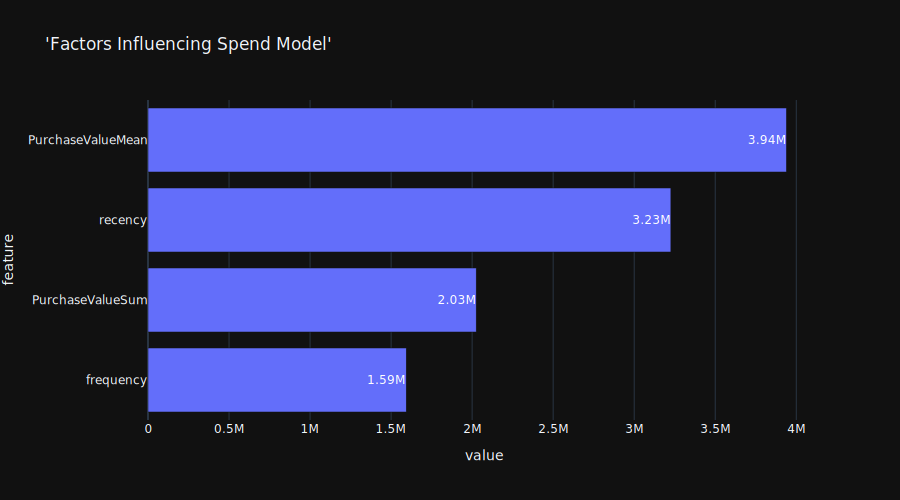

In [916]:
# Let's plot the data
imp_pur_val_dict = imp_pur_val_dict.sort_values(by='value', ascending=True).groupby('feature').head()
fig = px.bar(imp_pur_val_dict, x='value', y='feature', orientation='h', title="'Factors Influencing Spend Model'", template="plotly_dark", text_auto='.3s')
fig.update_layout(width=900, height=500).show()

##### **Observations and Insights:**

> We can see that for our spend amount model, `PurchaseValueMean,` followed by the `recency,` had the most impact on model performance. So if they purchased recently, they're more likely to spend more in the future. `frequency` does not matter much in this scenario.

**`Next:`**

Let's take a look at the probability model and see which features are most impactful as far as performance is concerned.

##### **Factors influencing probability model**

In [917]:
# Importance | Spend Probability Model
imp_pur_val_prob_dict = xgb_clf_model \
    .best_estimator_ \
    .get_booster() \
    .get_score(importance_type = 'gain')

In [918]:
# Reformat the dataframe
imp_pur_val_prob_dict = pd.DataFrame(
    data  = {
        'feature':list(imp_pur_val_prob_dict.keys()),
        'value':list(imp_pur_val_prob_dict.values())
    }
) \
    .assign(
        feature = lambda x: cat.cat_reorder(x['feature'] , x['value'])
    )

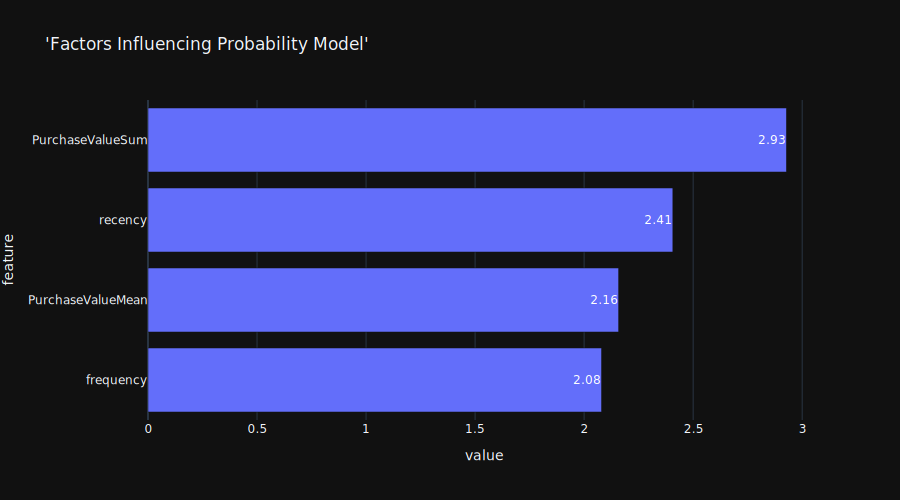

In [919]:
# Let's plot the data
imp_pur_val_prob_dict = imp_pur_val_prob_dict.sort_values(by='value', ascending=True).groupby('feature').head()
fig = px.bar(imp_pur_val_prob_dict, x='value', y='feature', orientation='h', title="'Factors Influencing Probability Model'", template="plotly_dark", text_auto='.3s')
fig.update_layout(width=900, height=500).show()

##### **Observations and Insights:**

> Similar to the spend model, `PurchaseValueMean,` followed by the `recency,` had the most impact on model performance. So the average spend and recency will determine if a customer purchases in the next 90 days.

> Depending on the client's business goals, this can have a profound effect.

> If they want to retain customers and increase their probability of spending in the next 90 days, they need to focus on increasing their purchase frequency and basket size.

## **Phase 7: Saving Your Work**

#### **Saving predictions**

Let's create a dataframe with all the features by combining them all into one data frame called predictions.

In [920]:
# Save Predictions
predictions_df = pd.concat(
    [
        pd.DataFrame(predictions_reg).set_axis(['pred_spend'], axis=1),
        pd.DataFrame(predictions_clf)[[1]].set_axis(['pred_prob'], axis=1),
        features_df.reset_index()
    ],
    axis=1
)

**`Context:`**

This captures all the results of our analysis, so we can see whether or not certain customers have actually spent money.

> Then we can also see whether or not they were predicted to spend money, their likelihood of spending, and how much they were expected to spend. So this helps us with the visualization/storytelling.

In [921]:
predictions_df.head()

,pred_spend,pred_prob,CustomerName,recency,frequency,PurchaseValueSum,PurchaseValueMean,Discount,Profit,spend_90_total,Day,DayofYear,WeekDay,Week,Month,Quarter,Year,AvgPurchaseValue,MonthsRetained,spend_90_flag
0,278.284180,0.471087,Aaron Bergman,-325.0,6,886.156,147.692667,0.0,0.0000,0.000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.000,0.0,0.0
1,223.353378,0.573050,Aaron Hawkins,-560.0,10,1725.996,172.599600,0.2,2.3380,18.704,18.0,352.0,6.0,50,12.0,4.0,2022.0,2.672,45.0,1.0
2,165.246552,0.564569,Aaron Smayling,-27.0,9,2879.404,319.933778,0.2,-6.4233,171.288,3.0,276.0,0.0,40,10.0,4.0,2022.0,57.096,40.0,1.0
3,342.549072,0.542698,Adam Bellavance,-15.0,12,4920.082,410.006833,0.2,441.7752,2835.538,33.0,1857.0,33.0,264,66.0,24.0,12132.0,619.254,162.0,1.0
4,165.122025,0.546529,Adam Hart,-6.0,13,2067.517,159.039769,0.6,-50.3976,1182.820,164.0,2106.0,41.0,299,71.0,28.0,14154.0,398.838,253.0,1.0


##### **Observations and Insights:**

> What we see are predictions for each customer. For example, customer `Aaron Hawkins` was predicted to spend `$223.4`, and actually spent within that time, but a lower amount of `$18.7`. Whereas customer `Adam Bellavance` was predecited to spend `$342.5`, and actually spent `$2835.5`.

Learn more about saving files here: [How to Save and Download files from Google Colab](https://www.youtube.com/watch?v=e8Syou92H8U)

In [922]:
predictions_df.to_csv("predictions.csv", index=False)

In [923]:
# ! cat predictions.csv

## **Phase 8: How To Use This Information**

To take advantage of the following information, we are going to try and answer the following questions:

1. Which customers have the highest spend probability in the next 90 days?
2. Which customers have recently purchased but are unlikely to buy?
3. Which customers represent our missed opportunities (big spenders that could be unlocked)?

#### **1. Which customers have the highest spend probability in the next 90-days?**
> Potential target for new products similar to what they have purchased in the past.

In [924]:
# # Let's wrangle the data
high_prob = predictions_df[['CustomerName', 'pred_prob', 'pred_spend', 'spend_90_total']]
high_prob = high_prob.sort_values('pred_prob', ascending=False).reset_index()
high_prob.head()

,index,CustomerName,pred_prob,pred_spend,spend_90_total
0,140,Chad McGuire,0.692224,335.686554,861.570
1,731,Susan Vittorini,0.692224,313.703094,1065.463
2,477,Logan Currie,0.689921,107.534042,94.754
3,408,Julie Creighton,0.682908,329.951263,155.310
4,676,Sanjit Engle,0.681933,179.076141,207.310


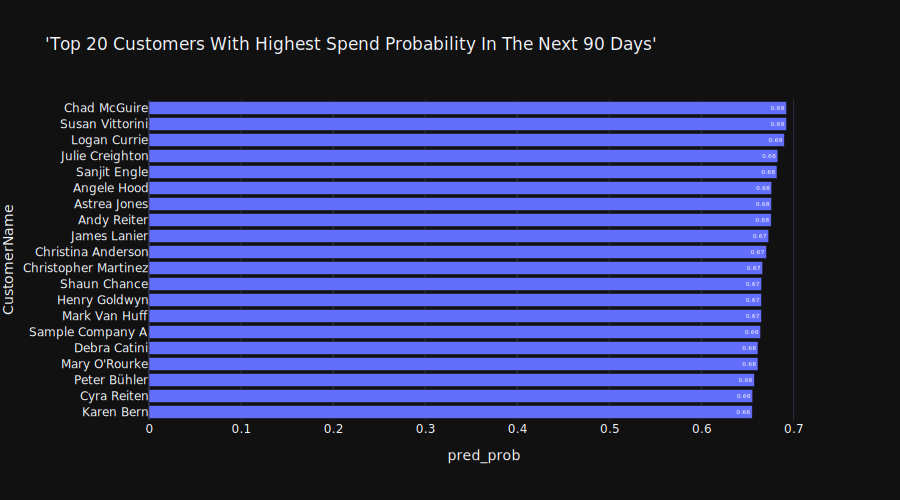

In [925]:
# Select top 20 only
high_prob_20 = high_prob.nlargest(20,'pred_prob')
high_prob_20 = high_prob_20.sort_values('pred_prob', ascending=True)
fig = px.bar(high_prob_20, x='pred_prob', y='CustomerName', orientation='h', title="'Top 20 Customers With Highest Spend Probability In The Next 90 Days'", template="plotly_dark", text_auto='.2')
fig.update_layout(width=900, height=500).show()

##### **Observations and Insights:**

> We can see that customer `Chad McGuire` for example had a spend probability of `69%` in the next 90 days, along with a pedicted spend of `$335.7`, and they actually spent `$861.6`.

#### **2. Which customers have recently purchased but are unlikely to buy?**
> Incentivize actions to increase probability

> Provide discounts, encourage referring a friend, nurture by letting them know what's coming

In [926]:
pot_lost = predictions_df[['CustomerName', 'recency', 'pred_prob', 'pred_spend', 'spend_90_total']]
pot_lost = pot_lost[(pot_lost['recency'] > -90) & (pot_lost['pred_prob'] < 0.40)].sort_values('recency', ascending=False).reset_index()
pot_lost.head()

,index,CustomerName,recency,pred_prob,pred_spend,spend_90_total
0,64,Barbara Fisher,-1.0,0.399773,41.544273,0.0
1,122,Cari Sayre,-1.0,0.394978,48.612167,0.0
2,707,Sonia Cooley,-2.0,0.334899,36.512386,0.0
3,536,Michelle Ellison,-2.0,0.335799,80.000626,0.0
4,41,Ann Steele,-2.0,0.291851,44.950909,0.0


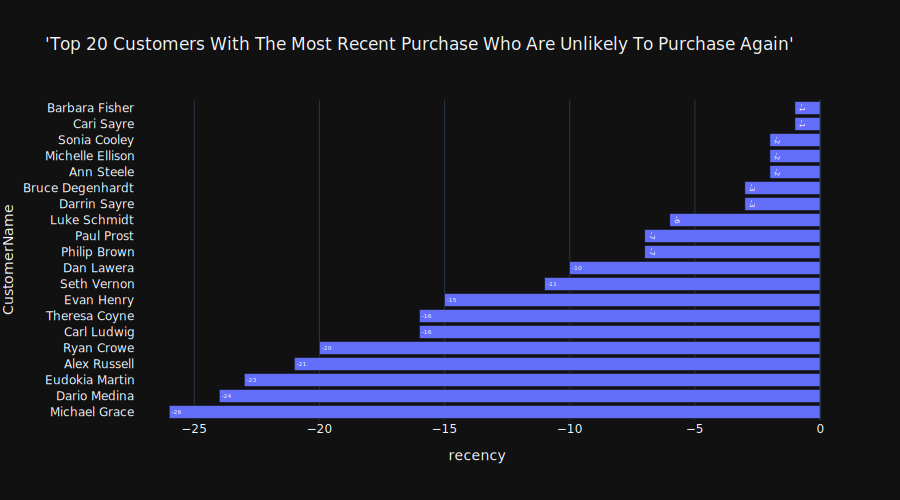

In [927]:
# Select top 20 only
high_recen_20 = pot_lost.nlargest(20,'recency')
high_recen_20 = high_recen_20.sort_values('recency', ascending=True)
fig = px.bar(high_recen_20, x='recency', y='CustomerName', orientation='h', title="'Top 20 Customers With The Most Recent Purchase Who Are Unlikely To Purchase Again'", template="plotly_dark", text_auto='.2')
fig.update_layout(width=900, height=500).show()

##### **Observations and Insights:**

> The customers who purchased recently and are unlikely to purchase in the next 90 days are led by `Barbara Fisher,` `Cari Sayre,` and `Sonia Cooley,` all with predicted probabilities ranging from `39%` and lower.

#### **3. Missed opportunities: Big spenders that could be unlocked**

> Send bundle offers encouraging volume purchases

> Focus on missed opportunities

In [928]:
mst_opp = predictions_df[['CustomerName', 'recency', 'pred_prob', 'pred_spend', 'spend_90_total']]
mst_opp = mst_opp[(mst_opp['spend_90_total'] == 0.0)].sort_values('pred_spend', ascending=False).reset_index()
mst_opp.head()

,index,CustomerName,recency,pred_prob,pred_spend,spend_90_total
0,544,Mike Caudle,-279.0,0.523659,630.359375,0.0
1,753,Tim Taslimi,-316.0,0.477209,603.791931,0.0
2,128,Carlos Meador,-617.0,0.513571,573.858032,0.0
3,98,Brad Thomas,-569.0,0.465811,547.793091,0.0
4,169,Clay Ludtke,-194.0,0.329124,417.044403,0.0


##### **Observations and Insights:**

> These are people our model believes should be purchasing but are not.

> For example, customer `Mike Caudle` was predicted to spend at least `$630.4`, but spent nothing.

> This population represents a lot of money that's sitting on the sidelines. People who we could potentially generate revenue from by just sending a well timed message.

## **Conclusion and Recommendations**

-----------------------------------------------------------------
### **Conclusion**
-----------------------------------------------------------------

We analyzed the Superstore dataset of nearly 10194 rows and 19 columns (adding requisite columns along the way) on behalf of our employer, the Tableau Superstore. Some of the things we uncovered include, but are not limited to the following:

- The average retention rate is: `0.18`
- The average churn rate is: `0.82`
- About `0.98 percent of the entire customer base are repeat customers`
- The average customer lifespan is approximately: `5.86 months`
- The average purchase value is approximately: `455.2 USD/Equivalent`
- The average purchase frequency rate: `48.32`
- The value for each customer is: `21994.19 USD/Equivalent`
- The average customer's lifetime value is: `128830.99 USD/Equivalent`

--------------------------------------------------
### **Recommendation to business**
--------------------------------------------------

Depending on what the client's goals are for the business, the RFM model can help us understand the following:

> We can see that customer `Chad McGuire` for example, had a spend probability of `69%` in the next 90 days, along with a pedicted spend of `$335.7`, and they actually spent `$861.6`.

    - These customers are potential targets for new products similar to what they have purchased in the past.

> The customers who purchased recently and are unlikely to purchase in the next 90 days are led by `Barbara Fisher,` `Cari Sayre,` and `Sonia Cooley,` all with predicted probabilities ranging from `39%` and lower.

    - Incentivize actions to increase their probability
    - Provide discounts, encourage referring a friend, and nurture by letting them know what's coming

> These are people our model believes should be purchasing but are not.
> - For example, customer `Mike Caudle` was predicted to spend at least `$630.4`, but spent nothing.
> - This population represents a lot of money that's sitting on the sidelines. People who we could potentially generate revenue from by just sending a well-timed message.

    - Send bundle offers encouraging volume purchases
    - Focus on missed opportunities

---------------------------------
###  **Further Analysis**
---------------------------------
There's more that can be done to potentially improve some of our findings.

> - Model Improvement: We can untilize methods and tools such as the below to improve our models performances.
  - Algorithms (201-P)
  - AutoML (201-P)
  - Hyper Parameter Tuning (201-P)

> - Forecasting: When will customers purchase?
  - We could potentially take another step by predicting when exactly each customer might purchase.

---------------------------------
###  **Sources & Resources**
---------------------------------

- Python and R Tips: https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/
- HubSpot: https://blog.hubspot.com/service/how-to-calculate-customer-lifetime-value
- pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
- ML: E-Commerce Data Forecasting & Clustering: https://www.kaggle.com/code/ma12492002/ml-e-commerce-data-forecasting-clustering
- Customer Lifetime & predict the purchase: https://www.kaggle.com/code/taherabuzeid/customer-lifetime-predict-the-purchase
- How to Select Top N Rows with the Largest Values in a Column(s) in Pandas?: https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/
- Plotly Open Source Graphing Libraries: https://plotly.com/graphing-libraries/
- stackoverflow: https://stackoverflow.com/
- Lab 59 (Python): [Customer Lifetime Value with Machine Learning](https://university.business-science.io/courses/541207/lectures/33418944)
- [fig.write_image not working](https://github.com/plotly/plotly.py/issues/3718)

In [929]:
# %%shell
# jupyter nbconvert --to html /content/Customer_Lifetime_Value_RFM_Analysis.ipynb